In [94]:
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
# import seaborn as sns
from tqdm.notebook import tqdm
import warnings
# warnings.filterwarnings('ignore')
# %matplotlib inline

import cv2
import csv
# import tensorflow as tf
# from keras.preprocessing.image import load_img
# from keras.models import Sequential, Model
# from keras.layers import Dense, Conv2D, Dropout, Flatten, MaxPooling2D, Input

In [95]:
# X = np.load('/content/drive/My Drive/Comp Vis Final Proj/alexis_vers/X.npy')

In [96]:
gender_dict = {0:'Male', 1:'Female'}
race_dict = {0:'White', 1:'Black', 2:'Asian', 3:'Indian', 4:'Other'}

In [97]:
# data = "/content/drive/My Drive/Comp Vis Final Proj/UTKFace"

In [98]:
rows = []
# image_paths = []
age_labels = []
gender_labels = []
race_labels = []

filename = 'UTK_train_coral_og.csv'

with open(filename, 'r') as csvfile:
    datareader = csv.reader(csvfile)
    for row in datareader:
        try:
            temp = row[1].split('_')
            age = int(temp[0])
            gender = int(temp[1])
            race = int(temp[2])
        except ValueError:
            print("Skipping file:", row)
            continue
        # image_paths.append(image_path)
        rows.append(row)
        age_labels.append(age)
        gender_labels.append(gender)
        race_labels.append(race)
        
filename = 'UTK_test_coral_og.csv'

with open(filename, 'r') as csvfile:
    datareader = csv.reader(csvfile)
    for row in datareader:
        try:
            temp = row[1].split('_')
            age = int(temp[0])
            gender = int(temp[1])
            race = int(temp[2])
        except ValueError:
            print("Skipping file:", row)
            continue
        # image_paths.append(image_path)
        rows.append(row)
        age_labels.append(age)
        gender_labels.append(gender)
        race_labels.append(race)

Skipping file: ['', 'filename', 'age', 'database']
Skipping file: ['', 'filename', 'age', 'database']


In [99]:
df = pd.DataFrame()
df['rows'], df['age'], df['gender'], df['race'] = rows, age_labels, gender_labels, race_labels
df.head()

,rows,age,gender,race
0,"[1, 36_0_1_20170117163203851.jpg, 36, utk]",36,0,1
1,"[3, 26_1_0_20170116171048641.jpg, 26, utk]",26,1,0
2,"[5, 52_0_1_20170117161018159.jpg, 52, utk]",52,0,1
3,"[6, 25_1_0_20170117134403373.jpg, 25, utk]",25,1,0
4,"[8, 27_0_3_20170119210058457.jpg, 27, utk]",27,0,3


In [100]:
y_rows = np.array(df['rows'])
y_gender = np.array(df['gender'])
y_age = np.array(df['age'])
y_race = np.array(df['race'])

In [101]:
# image_index = 103
# print("Original Gender:", gender_dict[y_gender[image_index]], "Original Age:", y_age[image_index])
# # predict from model
# pred = model.predict(X[image_index].reshape(1, 128, 128, 1))
# pred_gender = gender_dict[round(pred[0][0][0])]
# pred_age = round(pred[1][0][0])
# print("Predicted Gender:", pred_gender, "Predicted Age:", pred_age)
# plt.axis('off')
# plt.imshow(X[image_index].reshape(128, 128), cmap='gray');

In [102]:
X = np.load('X.npy')

7526
7526
Race: White


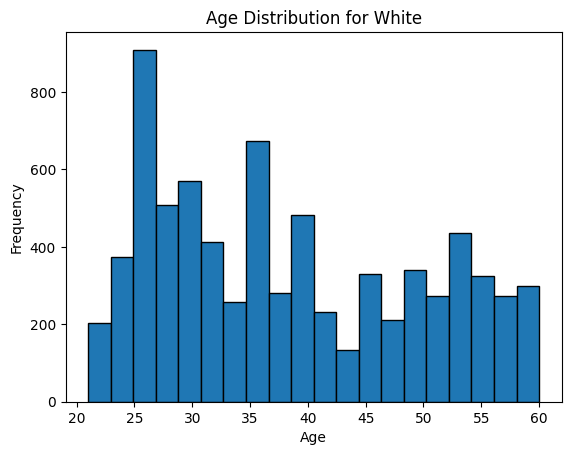

4594
4594
Race: Black


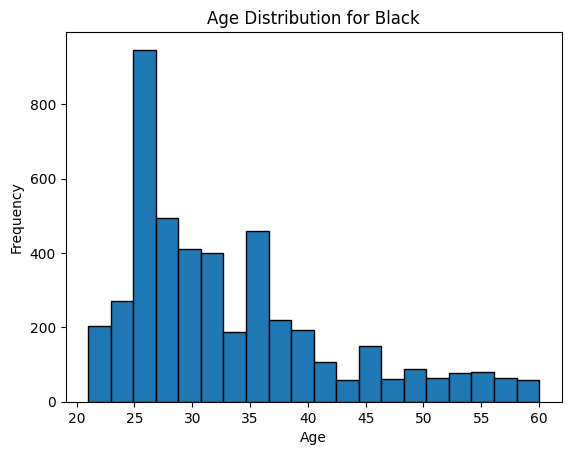

2553
2553
Race: Asian


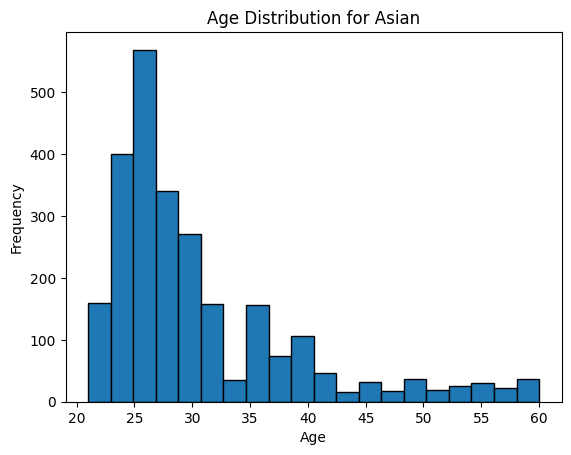

3748
3748
Race: Indian


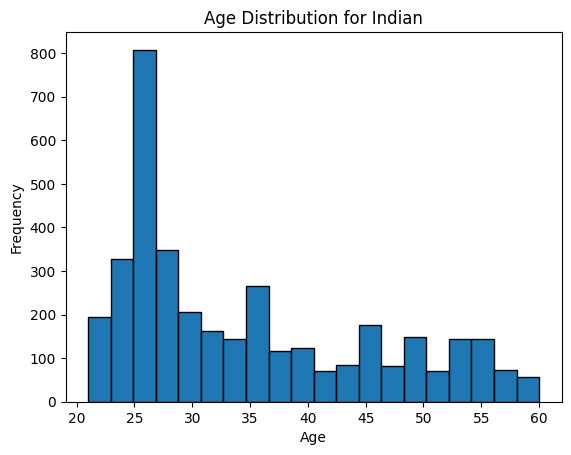

1298
1298
Race: Other


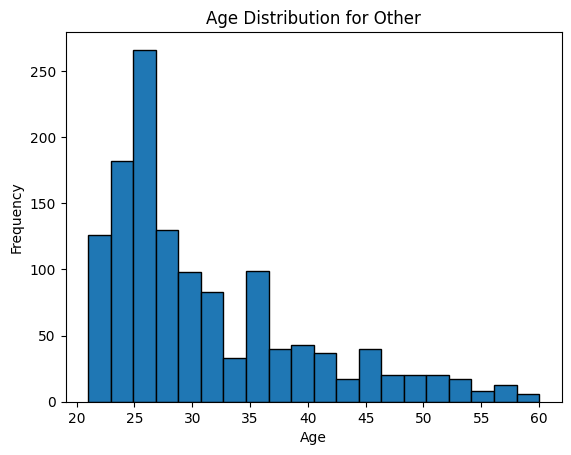

In [103]:
from sklearn.model_selection import train_test_split

# Dictionary to store datasets for each race
datasets_per_race = {}

# Split the dataset based on race
unique_races = np.unique(y_race)
for race in race_dict:
    race_indices = np.where(y_race == race)[0]
    # X_race = X[race_indices]
    y_row = y_rows[race_indices]
    y_age_race = y_age[race_indices]
    y_gender_race = y_gender[race_indices]
    # print(len(X_race))
    print(len(y_age_race))
    print(len(y_gender_race))
    # Split the race dataset into train and test sets
    # X_train, X_test, y_train, y_test = train_test_split(X_race, y_age_race, test_size=0.2, random_state=42)

    print(f"Race: {race_dict[race]}")
    # print(f"Number of samples: {len(X_race)}")

    # Plot the age distribution for each race
    plt.figure()
    plt.hist(y_age_race, bins=20, edgecolor='black')
    plt.title(f"Age Distribution for {race_dict[race]}")
    plt.xlabel("Age")
    plt.ylabel("Frequency")
    plt.show()


    datasets_per_race[race_dict[race]] = {'row': y_row, 'y': y_age_race, 'gender': y_gender_race}


## current experiments

In [104]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.utils import resample

# Define race labels mapping
race_mapping = {'White': 0, 'Black': 1, 'Asian': 2, 'Indian': 3, 'Other': 4}

# Initialize lists to store combined data
# image_paths = []
rows = []
age_labels = []
gender_labels = []
race_labels = []

# Calculate histogram of age distribution for the white group
white_age_hist, white_age_bins = np.histogram(datasets_per_race['White']['y'], bins=20)

# Balancing datasets for each race
for race, data in datasets_per_race.items():
    if race != 'White':
        race_data = data['y']
        # Calculate histogram of age distribution for the current race
        race_age_hist, race_age_bins = np.histogram(race_data, bins=20)
        # Resample the race data to match the age distribution of the white group
        resampled_race_data = []
        for i, count in enumerate(white_age_hist):
            if count == 0:
                continue
            age_range_indices = np.where((race_data >= white_age_bins[i]) & (race_data < white_age_bins[i + 1]))[0]
            # Check if age_range_indices is empty
            if len(age_range_indices) == 0:
                continue
            resampled_age_range_indices = np.random.choice(age_range_indices, size=count, replace=True)
            resampled_race_data.extend(race_data[resampled_age_range_indices])
            # print(resampled_age_range_indices)
            # Sample corresponding images
            resampled_rows = data['row'][resampled_age_range_indices]
            rows.extend(resampled_rows)
            # Sample corresponding genders
            resampled_genders = data['gender'][resampled_age_range_indices]
            gender_labels.extend(resampled_genders)
            # Sample corresponding ages
            resampled_ages = data['y'][resampled_age_range_indices]
            age_labels.extend(resampled_ages)
            # Sample corresponding race labels
            resampled_races = [race_mapping[race]] * count
            race_labels.extend(resampled_races)

    else:
        race_data = data['y']
        resampled_race_data = []
        resampled_race_data.extend(race_data)

        rows.extend(data['row'])
        gender_labels.extend(data['gender'])
        age_labels.extend(data['y'])
        race_labels.extend([race_mapping['White']] * len(data['y']))

    # Plot the balanced age distribution
    # plt.figure()
    # plt.hist(resampled_race_data, bins=20, edgecolor='black')
    # plt.title(f"Balanced Age Distribution for {race}")
    # plt.xlabel("Age")
    # plt.ylabel("Frequency")
    # plt.show()

# Convert lists to NumPy arrays
# rows = np.array(rows, dtype=object)
age_labels = np.array(age_labels)
gender_labels = np.array(gender_labels)
race_labels = np.array(race_labels)

# Create DataFrame
df_balanced = pd.DataFrame()
# print (image_paths.shape)
df_balanced['rows'] = rows
df_balanced['age'] = age_labels
df_balanced['gender'] = gender_labels
df_balanced['race'] = race_labels

# Display the first few rows of the DataFrame
print(df_balanced.head())


                                          rows  age  gender  race
0   [3, 26_1_0_20170116171048641.jpg, 26, utk]   26       1     0
1   [6, 25_1_0_20170117134403373.jpg, 25, utk]   25       1     0
2  [16, 53_1_0_20170110143534851.jpg, 53, utk]   53       1     0
3  [18, 23_1_0_20170117142807780.jpg, 23, utk]   23       1     0
4  [23, 23_1_0_20170116222839270.jpg, 23, utk]   23       1     0


In [109]:
expanded_df = pd.DataFrame(df_balanced['rows'].tolist(), columns=['', 'filename', 'age', 'database'])

train_expanded_df = expanded_df.iloc[::2]
test_expanded_df = expanded_df.iloc[1::2]

# # Save the new DataFrame to a CSV file
train_expanded_df.to_csv('UTK_train_coral.csv', index=False)
test_expanded_df.to_csv('UTK_test_coral.csv', index=False)

In [ ]:
np.save('/content/drive/My Drive/Comp Vis Final Proj/alexis_vers/X_balanced_withwhite.npy', image_paths)

In [ ]:
y_gender_balanced = np.array(df_balanced['gender'])
y_age_balanced = np.array(df_balanced['age'])
y_race_balanced = np.array(df_balanced['race'])

In [ ]:
input_shape = (128,128,1)

In [ ]:
inputs = Input((input_shape))

conv_1 = Conv2D(32, kernel_size=(3,3), activation='relu')(inputs)
maxp_1 = MaxPooling2D(pool_size=(2,2))(conv_1)

conv_2 = Conv2D(32, kernel_size=(3,3), activation='relu')(maxp_1)
maxp_2 = MaxPooling2D(pool_size=(2,2))(conv_2)

conv_3 = Conv2D(32, kernel_size=(3,3), activation='relu')(maxp_2)
maxp_3 = MaxPooling2D(pool_size=(2,2))(conv_3)

conv_4 = Conv2D(32, kernel_size=(3,3), activation='relu')(maxp_3)
maxp_4 = MaxPooling2D(pool_size=(2,2))(conv_4)

flatten = Flatten()(maxp_4)

# Fully connected layers
dense_1 = Dense(256, activation = 'relu')(flatten)
dense_2 = Dense(256, activation = 'relu')(flatten)
# dense_3 = Dense(256, activation = 'relu')(flatten)

dropout_1 = Dropout(0.3)(dense_1)
dropout_2 = Dropout(0.3)(dense_2)
# dropout_3 = Dropout(0.3)(dense_3)

output_1 = Dense(1, activation = 'sigmoid', name = 'gender_out')(dropout_1)
output_2 = Dense(1, activation = 'relu', name = 'age_out')(dropout_2)
# output_3 = Dense(1, activation = 'relu', name = 'race_out')(dropout_3)

# model = Model(inputs = [inputs], outputs = [output_1, output_2, output_3])
model = Model(inputs = [inputs], outputs = [output_1, output_2])

model.compile(loss = ['binary_crossentropy', 'mae'], optimizer = 'adam', metrics = ['accuracy','mae'])

In [ ]:
print(type(X))
print(type(df_balanced['image']))
X_balanced = df_balanced['image'].values
print(type(X_balanced))
print(X.shape)
print(df_balanced['image'].shape)
print(X_balanced.shape)
# X_balanced = X_balanced.reshape(len(X_balanced), 128, 128, 1)
# print(X_balanced.shape)
print(X[:1])
print(X_balanced[:1])


<class 'numpy.ndarray'>
<class 'pandas.core.series.Series'>
<class 'numpy.ndarray'>
(9819, 128, 128, 1)
(16709,)
(16709,)
[[[[0.4       ]
   [0.54117647]
   [0.60784314]
   ...
   [0.22745098]
   [0.20784314]
   [0.16470588]]

  [[0.38823529]
   [0.52941176]
   [0.59607843]
   ...
   [0.23921569]
   [0.21960784]
   [0.17254902]]

  [[0.36078431]
   [0.48627451]
   [0.56862745]
   ...
   [0.25882353]
   [0.24313725]
   [0.19607843]]

  ...

  [[0.98823529]
   [0.98823529]
   [0.98823529]
   ...
   [0.6627451 ]
   [0.67843137]
   [0.68627451]]

  [[0.98823529]
   [0.98823529]
   [0.98823529]
   ...
   [0.66666667]
   [0.68235294]
   [0.68627451]]

  [[0.98823529]
   [0.98823529]
   [0.98823529]
   ...
   [0.66666667]
   [0.68627451]
   [0.68627451]]]]
[array([[[0.15294118],
         [0.17647059],
         [0.2       ],
         ...,
         [0.50980392],
         [0.55294118],
         [0.6627451 ]],

        [[0.21568627],
         [0.17647059],
         [0.17647059],
         ...,
   

In [ ]:
print(type(image_paths))

<class 'numpy.ndarray'>


In [ ]:
history = model.fit(x = image_paths, y = [y_gender_balanced, y_age_balanced], batch_size=32, epochs = 30, validation_split = 0.2)

Epoch 1/30
418/418 [==============================] - 269s 638ms/step - loss: 18.9833 - gender_out_loss: 0.6792 - age_out_loss: 18.3040 - gender_out_accuracy: 0.5855 - gender_out_mae: 0.4753 - age_out_accuracy: 0.0394 - age_out_mae: 18.3040 - val_loss: 17.6228 - val_gender_out_loss: 0.5776 - val_age_out_loss: 17.0453 - val_gender_out_accuracy: 0.7319 - val_gender_out_mae: 0.4263 - val_age_out_accuracy: 0.0000e+00 - val_age_out_mae: 17.0453
Epoch 2/30
418/418 [==============================] - 257s 615ms/step - loss: 14.2450 - gender_out_loss: 0.5376 - age_out_loss: 13.7074 - gender_out_accuracy: 0.7388 - gender_out_mae: 0.3536 - age_out_accuracy: 0.0365 - age_out_mae: 13.7074 - val_loss: 11.5192 - val_gender_out_loss: 0.4127 - val_age_out_loss: 11.1065 - val_gender_out_accuracy: 0.8256 - val_gender_out_mae: 0.2817 - val_age_out_accuracy: 0.0000e+00 - val_age_out_mae: 11.1065
Epoch 3/30
418/418 [==============================] - 269s 645ms/step - loss: 12.3941 - gender_out_loss: 0.4782 

KeyboardInterrupt: 